# Sentiment Analysis of Distance-Based Fare System in Rwanda

# Data collection

In [8]:
# Reformatting the tweets data into JSON format
import pandas as pd

data = [
    {'textID': 'RPL-01', 'text': 'Muraho! Ese ziriya agency zijya gutwara abanyeshuri bagiye muri vacance ko zigenderaho nta bagenzi bafite,iyo abanyeshuri zibatwaye bibaho ko bishyura itike ikubye kabiri kuberako ije ishoye!!!?????', 'text_owner': 'Dad Yankee', 'date': '2024-12-08', 'Language':'kinyarwanda'},
    {'textID': 'RPL-02', 'text': "Transport iracyafite ibibazo Bus Nini sitwara abantu usanga kubera kuzuza Abantu ushobora kuyimaramo isaha nigice utegereje ko yuzura ibyo biba guhera 10h00-16h00 ugasanga biteje gukererwa akazi Imodoka ntoya zirakenewe muzasure Line yacyonga -Nyabugogo ", 'text_owner': 'NGANYIRENDE patrick Evariste', 'date': '2024-12-03', 'Language':'kinyarwanda'},
    {'textID': 'RPL-03', 'text': "Ariko, Iyo Abafata ibyemezo badatega mubona Aya mafr ari macye NI ugikuba 2", 'text_owner': 'Mutaganzwa Jean Paul', 'date': '2024-12-02', 'Language':'kinyarwanda'},
    {'textID': 'RPL-04', 'text': "Thank you, RURA, for your great work in supporting and valuing customers in transportation. I want to raise a concern about Kabuga Bus Park.They don’t accept MoMo payments and ask passengers to withdraw cash,especially in the evenings, despite the Government’s push for a cashless.", 'text_owner': 'Demeyo', 'date': '2024-12-04', 'Language':'English'},
    {'textID': 'RPL-05', 'text': "Yewe ibi rwose mubisuzume kuko abaviramo munzira urakozaho card bakagukata 2 cg bikanga", 'text_owner': 'Mwalimu', 'date': '2024-12-05', 'Language':'kinyarwanda'},
    {'textID': 'RPL-06', 'text': "Turarokotse wasangaga wavaga 12 kugera kimironko woshyura amwe nuvuy kabuga", 'text_owner': 'Nywamazi birashira', 'date': '2024-12-03', 'Language':'kinyarwanda'},
    {'textID': 'RPL-07', 'text': "Signed by Who ?", 'text_owner': 'Kavara Kavara', 'date': '2024-12-02', 'Language':'English'},
    {'textID': 'RPL-08', 'text': "Muzatubarize na MTN Rwanda,Ikibazo iyo woherereje umuntu frw bakwereka ikiguza mbere yuko ushyiramo PIN,Ariko mu kubikuza bakakwereka ikiguzi umu Agent yamaze kukubikuriza,Ntagaruriro kandi ugasanga bagukase menshi💸💸Mutubarize", 'text_owner': '🇷🇼Nizeyimana Jean Claude', 'date': '2024-12-04', 'Language':'kinyarwanda'},
    {'textID': 'RPL-09', 'text': "Mubanze muzane buses zihagije, nizo mwavuze ntazihari", 'text_owner': 'isi siyaso', 'date': '2024-12-04', 'Language':'kinyarwanda'},
    {'textID': 'RPL-10', 'text': "Kibaya - Remera Yo nangahe nahose Remera_Nyanza", 'text_owner': 'Kagaba Eddy', 'date': '2024-12-02', 'Language':'kinyarwanda'},
    {'textID': 'RPL-11', 'text': "Nkunda urwego nkabura icyo nduha! u Rwanda ni rweme! Muzanatekereze uko intera hagati y'ikirometero n'ikindi yaba uniforme...", 'text_owner': 'Vedaste', 'date': '2024-12-05', 'Language':'kinyarwanda'},
    {'textID': 'RPL-12', 'text': "Ibi nibyiza cyane pe gusa RURA and Rwanda police mwite kukibazo cyo gutendeka abashofeur Niba umushahara arimuke muwongere kuko bashyiramo  110 mugitondo nanimugoroba kuko baba bazi ko nta police irimo ntibyazoroha  umugenzi asohoka huzuye bigatera akavuyo nubukererwe thanks", 'text_owner': 'Baziryiki', 'date': '2024-12-03', 'Language':'kinyarwanda'},
    {'textID': 'RPL-13', 'text': "Mwiriwe neza mwadufashije ko ikarita za @Tap&Go ko zabuze basi zikaboneka ko ugera ku mu Agent wa tap&go agahita akubwirango ndaguha ishaje umpe 1k  ntanigiceri kiriho knd inshya yaraguraga 1k knd iriho na 500 yurugendo", 'text_owner': 'Ndutiye T Gad', 'date': '2024-12-03', 'Language':'kinyarwanda'},
    {'textID': 'RPL-14', 'text': "Ni ukuvuga ko imashini bakozaho ikarita yabaye upgraded kuburyo izajya imenya indeshyo y’urugendo bus yakoze imenye ayo ikura kw’ikarita y’umugenzi??", 'text_owner': 'Cyril Ndegeya', 'date': '2024-12-02', 'Language':'kinyarwanda'},
    {'textID': 'RPL-15', 'text': "Yego, sisiteme ikoze ku buryo imenya urugendo (distance) umugenzi yakoze. Iyo umugenzi ageze aho asohokera muri bisi asabwa gukozaho ikarita, kugira ngo asoze urugendo, bityo yirinde kwishyura amafaranga y'urugendo rwose. Murakoze", 'text_owner': 'Rwanda Utilities Regulatory Authority - RURA', 'date': '2024-12-03', 'Language':'kinyarwanda'},
    {'textID': 'RPL-16', 'text': "Yewe ibi rwose mubisuzume kuko abaviramo munzira urakozaho card bakagukata 2 cg bikanga", 'text_owner': 'Mwalimu', 'date': '2024-12-05', 'Language':'kinyarwanda'},
    {'textID': 'RPL-17', 'text': "Mubanze muzane buses zihagije, nizo mwavuze ntazihari", 'text_owner': 'isi siyaso', 'date': '2024-12-04', 'Language':'kinyarwanda'},
    {'textID': 'RPL-18', 'text': "Nones ntakuntu mwashyiraho imashini 2 iyi mbere ikagumaho then hakajyaho nindi y' inyuma. Kugirango byihute?", 'text_owner': 'SUBIKA', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-19', 'text': "ubwo kongera gukozaho bwa kabiri ntibizandindiza urugendo burundu noneho 🤦‍♀️ibaze ligne iviramo abantu 10 bakozaho,yongera igenda ihagarara bakozaho", 'text_owner': 'Harris Kamala', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-20', 'text': "Ni ukuvuga ko imashini bakozaho ikarita yabaye upgraded kuburyo izajya imenya indeshyo y’urugendo bus yakoze?", 'text_owner': 'Cyril Ndegeya', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-21', 'text': "Ubwo se umuntu uzajya avamo akoze 1.4km azajya yishyura gute?", 'text_owner': 'INGWE_MU_MUJYI', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-22', 'text': "Nonese metero ko mutazibara", 'text_owner': 'RUBEBE', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-23', 'text': "Nibwo mwakora ibintu noneho birimo gahunda y’umuturage ku isonga ✍️✍️✅", 'text_owner': 'NAYITURIKI Anicet/RUTIJANA', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-24', 'text': "Ikibazo cyo gutinda kw’imodoka zitwara abagenzi kirihutirwa cyane", 'text_owner': 'John B. Simbaburanga', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-25', 'text': "Ibi bintu ni byiza ku rwego rwo hejuru.", 'text_owner': 'Ubumuntu buruta ubu-kiristu', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-26', 'text': "Ese wifi mu mabus yo yahereye he ko tutakiyibona kandi abagenzi tuyishyura? Murakoze", 'text_owner': 'Rudahunga', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-27', 'text': "Nizijya muntara muzabikoreho rwose kuko habaho kurengana cyane cyane rwose", 'text_owner': 'King', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-28', 'text': "Nine se ubu bwo si ikindi gihe cyo kuguma mu nzira abagenzi bategereje ? harimo umwanya munini wo kubanza gusohoka umuntu akozaho akozaho sinzi icyo mwabitekerejeho ariko n'ubundi bizajya bitinza abantu mu ngendo ariko ubwo ari igerageza reka turebe ibyo aribyo #Dove", 'text_owner': 'Lyvine Rwanda', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-29', 'text': "Mwiriwe neza ywasaga gusobanurirwa  ububuryo buzaba bwiza mukutworohereza kungendo haba mukutwihutishiriza service nigabanyirizwa kubiciro murakoze!", 'text_owner': 'Ishimwe Djibrile', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-30', 'text': "Iyo gahunda ninziza  gusa nyagatare , karangazi turatabaza kubwa service iteye isoni ya @reg_rwanda tumaze ukwezi tudacana turingo 5 kubera inkuba yakubise ipoto ariko baratwikiza burimunsi ntibaze kudufasha @NyagatareDistr @RURA_RWANDA mudusabire uburenganzira bwacu murakoze", 'text_owner': 'Shaffy Bapfakurera', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-31', 'text': "@RURA_RWANDA Thanks for the new information! After this assessment, we would like you to regulate the price charged at the Musanze Road tax park to Cyanika Border, similar to how it has been regulated in Kigali. Imagine having to pay the same fare to travel to Sunrise School", 'text_owner': 'Bluesky Engineering ltd', 'date': '2024-12-03', 'Language': 'english'},
    {'textID': 'RPL-32', 'text': "Byiza cyane", 'text_owner': 'ANTOINE', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-33', 'text': "Muzatubwire nokujya muntara 👍👍👍👍", 'text_owner': 'sultan makenga 🇷🇼🇷🇼', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-34', 'text': "Byiza cyane mwabikoze neza", 'text_owner': 'Rügãmbá', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-35', 'text': "Bravo 👏", 'text_owner': 'MZ™♪♦♣♥', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-36', 'text': "Mwabera noneho murebye agahinda rubanda bari bafite  ark ikibazo cya matax mwagifatiye uwuhe muti urugero kabuga nyagasambu  umuntu yishyura 500frs", 'text_owner': 'Niyonagize Nathan', 'date': '2024-12-03', 'Language': 'kinyarwanda'},    {'textID': 'RPL-37', 'text': "Ibi bintu ni byiza ku rwego rwo hejuru.", 'text_owner': 'Ubumuntu buruta ubu-kiristu', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-38', 'text': "Murakoze cyane. Ese wifi mu mabus yo yahereye he ko tutakiyibona kandi abagenzi tuyishyura? Murakoze", 'text_owner': 'Rudahunga', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-39', 'text': "Ibi ubu ntibizahombya bus companies ra?! Uwo ningera iyo njya ariko nkakozaho kandi ku ikarita ntafiteho ayuzuye,ubwo bizagenda bite?! Ko ari ha handi uzajya ubona umuntu ava muri bus yiruka niba nta cash za top up afite?!", 'text_owner': 'Jean Paul Mutamba', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-40', 'text': "@RURARWANDA muzatuzirikane umuntu yekujya akererwa akazi bitewe nuko umuntu aba agomba gutega 2 Wenda byagabanya nigiciro cyurugendo ndetse nana bashimira ko ubu umugenzi uva nyabugogo to Kanombe babonye bus iherayo direct nahandi muzadufashe murakoze", 'text_owner': '+250🇷🇼🇷🇼🇷🇼', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-41', 'text': "Erega ibibazo twebwe abakoresha bus tugira cyane cyane n'itinda ryo guhaguruka kwa bus", 'text_owner': 'sankara', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-42', 'text': "Nzabisoma neza ejo ntuje kuko ndabona murimo kuncanga peee 😂😂😂😂😂", 'text_owner': 'Mark Augustine 🇷🇼🇺🇬🇹🇿🇧🇮🇨🇩🇰🇪', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-43', 'text': "Example ukaba uvuye Kigali ujya hirya yo kubijyega aho bita kuri aret muri kinazi ukishyura kimwe nugera huye", 'text_owner': 'King', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-44', 'text': "Ubwox umuntu aramutse avuye nko kuri CHIC agiye Downtown icyuma cyakuraho angahe, cyabara metero ?", 'text_owner': '𝗪𝗶𝗿𝗮𝘁𝗮𝗻𝗶𝗸𝗶 💉', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-45', 'text': "Ariko RURA bafashe abantu bo kujya bapakirwa nk'imyaka pe nkaho nta gaciro bafite @RURA_RWANDA", 'text_owner': 'U.R.M.A', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-46', 'text': "Iyo Gahunda ninziza arko gutinda kwimodoka mukivugaho iki?noneho Company ya JALI na RITCO bo rwose ntibabwirwa kko bavuga nabi kongeraho ko imodoka zabo iyo zigeze SONATUBE ziraparika kabisa", 'text_owner': 'RUKUNDO Elias', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-47', 'text': "Byumvikana neza nubwo harimo integral 🤓✍🏾", 'text_owner': 'Fabrice MUKUNZI', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-48', 'text': "Ni Byiza pe!! Ariko munibuke birembo na kami bitagira imodoka iva ikanajya nyabugogo.Abagerageje gutwara abagenzi baho barabibuzwa bakabwirwa ko iyo ligne itashyizweho na RURA.", 'text_owner': 'KANYABUGABO', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-49', 'text': "Ese nyabyondo ko dufite imodoka ziditwara bagashyiraho ibiciro uko bashaka kumanywa ni 700frw ubundi bagaca abantu 1000frw bakavugako ntawubagenga bimeze bite? Mudusobanurire", 'text_owner': 'BITSUMUTIMA AMIEL', 'date': '2025-01-12', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-50', 'text': ".", 'text_owner': 'Manzi Ferdinand', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-51', 'text': "Murakoze kojyera kuvugurura iyi mikorere kuko byabangamiraga benshi gusa byaba byiza no kunyara mubijyanyeyo", 'text_owner': 'nkurunziza reverie', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-52', 'text': "RURA mwadufasha Ku kibazo cy'Imodika zikorera mu majyepfo Nyabugogo- Kamonyi za minibus izo dukunze kwita twegerane, abazikoresha usanga bishyuzwa amafranga menshi ugereranyije ni biciro mwashyizeho kdi ugasanga na ticket batanze zidahuye n'amafranga yishyujwe, mwadufasha!", 'text_owner': 'Iradukunda Gerard Magellan', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-53', 'text': "Igitekerezo : Abagenzi turasabwa gufatanya n'abakoze iri gerageza kugirango bitazasaba ko hifashishwa abandi bantu biyongera kumushoferi.", 'text_owner': 'muhire eugene', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-54', 'text': "Mwiriwe nabazaga umugenzi c uzakozaho nyuma bagasanga amafaranga yarafite kwikarita nimakeya ugereranyije nurugendo yakoze bizagenda bite?", 'text_owner': 'wakisasa lass', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-55', 'text': "Mwiwe? Ubuse uwinyuma azacahe akozaho nukuntu ziri ya bus zipakira😂😂😂😂", 'text_owner': 'simbararikiye', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-56', 'text': "Kbx byaba arisaw", 'text_owner': 'Niyirora Patric', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-57', 'text': "Ibi twabyifuje igihe cyinini murakoze kureba kure uru ni Urwanda twifuza", 'text_owner': 'Nzabamwita Abuba', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-58', 'text': "wow ibi nibyiza cyane kubanyarwanda kwishyura igiciro kingana na service uhawe", 'text_owner': 'Uwimpuhwe Augustave', 'date': '2024-12-04', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-59', 'text': "This seems to be good .Thanks RURA", 'text_owner': 'Saano stephen', 'date': '2024-12-02', 'Language': 'english'},
    {'textID': 'RPL-60', 'text': "Karuruma _downtown", 'text_owner': 'Jean claude Tuyisenge', 'date': '2024-12-17', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-61', 'text': "Njye Ndumva Byoroshye Kumenya Indeshyo Yaho Umuntu Avuye Kugera Aho Ashaka Kuviramo Kuko Bus Bazishyiramo Iyo Reglage( Kilometrage).Icyibazo Mbona Cyaba Shirumuteto Zuzura No Hejuru, Gusohoka Bizoroha Ubwo Umuntu Akozaho? Nacyo Kampani Za Transport Nababishinzwe byigweho neza.", 'text_owner': 'Manzi C.', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-62', 'text': "Byaba byiza kurushaho mudufashije iyi gahunda ikagenderwaho no muyindi mihanda iri inyuma ya Kigali.", 'text_owner': 'Iradukunda Josiane', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-63', 'text': "Wow hose mubihashyire pe turishimye", 'text_owner': 'Young art design', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-64', 'text': "Muzadufashe ni hohoterwa rikorerwa umugenzi ufite agakapu mu ntoki ucibwa amafaranga akubye gatatu ay'urugendo birakabije", 'text_owner': 'Jean marie vianney Manirambona', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-65', 'text': "Yewe ndabo hari abafite resistance ariko njye ndasanga ibi ari byiza pee. Kdi bizagenda neza", 'text_owner': 'eric twizeyimana', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-66', 'text': "Mu gihe mukomeje kuvugurura ibyiza, murebe uko mwahindura ligne ya Karama (Norvege)-Kuryanyuma kuko ubu hakorera imodoka 1 gusa igihe ishakiye. Ligne yahinduka ikaba *KARAMA (NORVEGE)-MU MUJYI (DOWNTOWN), yabona abakiliya benshi kandi hakanavaho gutega kabiri", 'text_owner': 'Theoneste KAYITARE', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-67', 'text': "Ibi Bintu bizaba byiza cyane", 'text_owner': 'JeanPaul DUSENGIMANA', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-68', 'text': "Ibi ni byiza, kuko umuntu yavaga kabuga agiye kumurindi akishyura amafaranga angana n'ayugera nyabugogo igihe bari muri bus imwe.", 'text_owner': 'Biziyaremye J.B', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-69', 'text': "Ariko mutekereza muri kigali gusa kandi no muntara transport irakora ubwo buryo nibukunda ndumva no muntara bwahagera kuko bwaba busobanutse kuko muntara ntabiciro bihaba biterwa nibura cg iboneka ryabagenzi.thx", 'text_owner': 'Mbonyinshuti Ephrem', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-70', 'text': "Ibyo mwakoze nibyo pe kuko harabahombaga bite we no kwishyura menshi Kandi bakoze urugendo ruto", 'text_owner': 'Dr. Deo', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-71', 'text': "Byaba byiza iyi gahunda ikomeje no mu ntara, amakarita agakoreshwa mu gihugu hose.", 'text_owner': 'Habarurema saleh', 'date': '2024-12-07', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-72', 'text': "Ibyo turabikunze rwose", 'text_owner': 'brighton john', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-73', 'text': "Ari bungane nayo wishyura uva nyamagabe ugera gisakura nubundi aba 3.5k Naho gutega imodoka muzikora amasaha yijoro ntatike baguha utari bukore urugendo rurerure Ese abahafi ntiberewe gutwarwa muri izo bus za nijoro???", 'text_owner': 'Nshimiyimana jean de Dieu', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-74', 'text': "Aho usanga bibangamira abagenzi umuntu Akajyenda kuko ntakundi yabijyenza nyine niba kuva kigali ugera aho bita kuwinka ari 8.2k no kuva kigali ugera rusizi akaba ari 8.4k nigute kuva kuwinka ugera rusizi ahinduka 3k No kuva ruzizi ugera nyamagabe akaba 3.5k???", 'text_owner': 'Nshimiyimana jean de Dieu', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-75', 'text': "This the good idea kandi abagenerwa bikorwa nitwe tuzatuma iba success ariko muzibuke nabo muntara nyamuneka urugero rwahafi ninko kumodoka zijya cg ziva kigali Rusizi usanga ligne yose ari 8.4k ariko iyo utega imodoka irenga kitabi itari bugere buhinga wishyura ligne yose ya rsz", 'text_owner': 'Nshimiyimana jean de Dieu', 'date': '2024-12-03', 'Language': 'english/kinyarwanda mix'},
    {'textID': 'RPL-76', 'text': "Turabyishimiye", 'text_owner': 'Pascal DUSINGIZIMANA', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-77', 'text': "Ahangaha mukoze akantu keza p! Nizereko muraza no mumuhanda musanze cyanika! Nigute umuntu ugiye karwasa, gahunga yishyura kimwe n'ugiye mu cyanik? Mubudufashemo rwose kd akantu mugiye gukora nikeza p!!", 'text_owner': 'apr@kumutima (Emmanuel HATANG)', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-78', 'text': "Mubirebeho no muntara kuko naho birahari urugero Nka musanze_cyanika uviramo munzira ku ikarita ukurwaho amafaranga y'urugendo rwose", 'text_owner': 'Dr Jean Eduardo Erikhan', 'date': '2024-12-04', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-79', 'text': "Ibi bintu ni byiza, Murakoze @RURA_RWANDA, reka twizera ko igerageza rizagenda neza bigatangira gukoreshwa muri @CityofKigali", 'text_owner': 'Etienne Niyomugaba', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-80', 'text': "Abamotari babonye akazi", 'text_owner': 'Mukunzi innocent', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-81', 'text': "Kubera iki ibyo mutabizana mu intara Koko?", 'text_owner': 'Jean Bosco HAKIZIMANA', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-82', 'text': "Mwaramutse, ibibinu nibyiza pe , ikibazo nikariya kanu ko kongera gukozaho", 'text_owner': 'mugisha Alex', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-83', 'text': "Nimugabanye nigiciro kingendo zijya muntara nikinini rwose", 'text_owner': 'Misekigoroye', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-84', 'text': "Ahaaaaaaa!! Ndumva muticaye Ubusa", 'text_owner': 'GasigwaOfficial', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-85', 'text': "Rssb", 'text_owner': 'kabwana', 'date': '2024-12-04', 'Language': 'unknown'},
    {'textID': 'RPL-86', 'text': "Ese ikintu cyo gutinda muri gare ugasanga abagenzi bamaze amasaha 3 bicaye mumodoka murabivugaho iki?", 'text_owner': 'intare yinkazi', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-87', 'text': "BUGESERA-MUSENYI SECTOR ABATURAGE BARISHIMIRA BUS MWABAHAYE MWAGIZE NEZA, MUKOMEZE MUTUREBERE NUKUNTU TWAKONGERA KUGIRA NETWORK ZA MTN TUMAZE UMWAKA NAMEZI 9 ZARAVUYEHO. LIFE WITHOUT NETWORK IS LIKE BEING LIVING IN CYCLE OF DARKNESS. TX", 'text_owner': 'Daniel HAKUZWEYEZU', 'date': '2024-12-03', 'Language': 'english/kinyarwanda mix'},
    {'textID': 'RPL-88', 'text': "Ibi bintu mukoze ni Sawa gusa sinabontemo Nyanza (kicukiro). Nimukomeze bayobozi Beza mutekerereze nabagenzi bagowe Bagana #NYABYONDO RWOSE.", 'text_owner': 'Daniel HAKUZWEYEZU', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-89', 'text': "Iryo sigerageza kuko ikintu nkekako cyitwa igerageza kitarigeze gikoreshwa narimwe kdi ndakeka mumyaka yaza 2009 twarakoraga ingedo muri KBS dukoresheje Ubu buryo ,kdi bwari bwiza pe.", 'text_owner': 'ISHEMA🇷🇼', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-90', 'text': "Aha rero izo modoka zitwara abagenzi muburyo bwa rusange rwose zikeneye conductor ushinzwe service muri rusange kuko driver gushyiramo abantu, nimizingo, kumenya umutekano wabantu atwaye biragoye, bibaho havamo kuvuga nabi muzarebe uburyo byakwigwaho", 'text_owner': 'Igeno Ally Assouman', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-91', 'text': "Biteye kwibaza cyane Igihe umugenzi asohotse adasoje urugendo akazagaruka nyuma yununsi wenda avuye rusizi ntibizabarwa ibyo birometero byose", 'text_owner': 'Ninjye Ubivuze', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-92', 'text': "Turasaba ko ibi bintu byazakorwa no mumihanda yo mucyaro cyane cyane ikoreshwamo ikarita nka musanze- cyanika cyangwa Musanze- kinigi kuko abagenzi nitwebwe tubihomberamo cyane", 'text_owner': 'Nzarorimana Schadrack', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-93', 'text': "Ahubwo kugirango byihute ndumva bashyira aka machine ka tap n go ku muryango wimbere ukozaho winjira nakandi inyuma ukozaho usohoka", 'text_owner': 'leon', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-94', 'text': "byiza cyane ,ingendo zo muntara ,bigiye kumera neza cyane.", 'text_owner': 'Jean Baptiste MFASHIJWENIMANA(sebabiri)', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-85', 'text': "Rssb", 'text_owner': 'kabwana', 'date': '2024-12-04', 'Language': 'unknown'},
    {'textID': 'RPL-86', 'text': "Ese ikintu cyo gutinda muri gare ugasanga abagenzi bamaze amasaha 3 bicaye mumodoka murabivugaho iki?", 'text_owner': 'intare yinkazi', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-87', 'text': "BUGESERA-MUSENYI SECTOR ABATURAGE BARISHIMIRA BUS MWABAHAYE MWAGIZE NEZA, MUKOMEZE MUTUREBERE NUKUNTU TWAKONGERA KUGIRA NETWORK ZA MTN TUMAZE UMWAKA NAMEZI 9 ZARAVUYEHO. LIFE WITHOUT NETWORK IS LIKE BEING LIVING IN CYCLE OF DARKNESS. TX", 'text_owner': 'Daniel HAKUZWEYEZU', 'date': '2024-12-03', 'Language': 'english/kinyarwanda mix'},
    {'textID': 'RPL-88', 'text': "Ibi bintu mukoze ni Sawa gusa sinabontemo Nyanza (kicukiro). Nimukomeze bayobozi Beza mutekerereze nabagenzi bagowe Bagana #NYABYONDO RWOSE.", 'text_owner': 'Daniel HAKUZWEYEZU', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-89', 'text': "Iryo sigerageza kuko ikintu nkekako cyitwa igerageza kitarigeze gikoreshwa narimwe kdi ndakeka mumyaka yaza 2009 twarakoraga ingedo muri KBS dukoresheje Ubu buryo ,kdi bwari bwiza pe.", 'text_owner': 'ISHEMA🇷🇼', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-90', 'text': "Aha rero izo modoka zitwara abagenzi muburyo bwa rusange rwose zikeneye conductor ushinzwe service muri rusange kuko driver gushyiramo abantu, nimizingo, kumenya umutekano wabantu atwaye biragoye, bibaho havamo kuvuga nabi muzarebe uburyo byakwigwaho", 'text_owner': 'Igeno Ally Assouman', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-91', 'text': "Biteye kwibaza cyane Igihe umugenzi asohotse adasoje urugendo akazagaruka nyuma yununsi wenda avuye rusizi ntibizabarwa ibyo birometero byose", 'text_owner': 'Ninjye Ubivuze', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-92', 'text': "Turasaba ko ibi bintu byazakorwa no mumihanda yo mucyaro cyane cyane ikoreshwamo ikarita nka musanze- cyanika cyangwa Musanze- kinigi kuko abagenzi nitwebwe tubihomberamo cyane", 'text_owner': 'Nzarorimana Schadrack', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-93', 'text': "Ahubwo kugirango byihute ndumva bashyira aka machine ka tap n go ku muryango wimbere ukozaho winjira nakandi inyuma ukozaho usohoka", 'text_owner': 'leon', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-94', 'text': "byiza cyane ,ingendo zo muntara ,bigiye kumera neza cyane.", 'text_owner': 'Jean Baptiste MFASHIJWENIMANA(sebabiri)', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-95', 'text': "Mushyireho Imashini ebyiri imwe inyuma indi imbere @RURA_RWANDA kugirango gukozaho byihute. Gusa nubundi ntacyo muhinduye birutwa nuko byari bimeze. Nonese nubundi ko amafaranga mwayongereye ubwo urumva abantu bungutse iki?", 'text_owner': 'Umunyafurika nyawe', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-96', 'text': "Harebwe ukuntu no muntara hakoreshwa ikarita tap and go, kuko mu minsi mikuru kuva muntara biba bikaze hishyuzwa menshi", 'text_owner': 'Nibereye murugo🐰', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-97', 'text': "Rwose muri kwiga umushinga mwiza pe,abategera munzira hagati barashubijwe kuko havanyweho akarengane yakorerwaga", 'text_owner': 'MUSANGAMFURA Adolphe Soumare', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-98', 'text': "Well done,", 'text_owner': 'Isimbi Rosine', 'date': '2024-12-03', 'Language': 'english'},
    {'textID': 'RPL-99', 'text': "🙏🙏🙏🙏 amashyi ngo kacikaci", 'text_owner': 'Wacele7', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-100', 'text': "Mwakoze @RURA_RWANDA ariko mutekereze no mu ntara igiciro ku Urugendo kiri hejuru kuburyo kiri gutandukanya ababyey n'abana, abagabo n'abagore ndetse ishuti n'abavandimwe. Mbega kujya I Kigali uvuye mu ntara haragendwa n'umugabo hagasiba undi. Kandi hari abacu.", 'text_owner': 'M.v. Rwanda my country', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-101', 'text': "Ikibazo abantu dufite si ibiciro ahubwo dufite ikibazo ku itinda munzira. None iyo gahunda ije kuraza abantu munzira noneho.", 'text_owner': 'KAI', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-102', 'text': "Turabanshimiye rwose @RURA_RWANDA Kumyanzuroo mwafashe gusa ntendaga ko muza gukurikirana nikibazo cya Bus zitinda guhaguruka. Nukuri mwaba mudufashije", 'text_owner': 'CONDO', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-103', 'text': "Thank you, @RURA_RWANDA, for saving people from big fish. Umuturage ku isonga🙏🙏", 'text_owner': 'Dr Aimable DUSENGE', 'date': '2024-12-03', 'Language': 'english/kinyarwanda mix'},
    {'textID': 'RPL-104', 'text': "Mubishyire mu byerecyezo byose by'igihugu🚃🚃🚃", 'text_owner': '🇷🇼Nizeyimana Jean Claude', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-105', 'text': "Nonese kowumva ayurugendo yose muzaba mwayatwaye nakozaho tap out azahita asubizwa ayasigaye cg azakuraho", 'text_owner': 'Mumurwa Ndi King 👑', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-106', 'text': "Ikibazo mugira mwigana ibyahandi mukibagirwa KO muri uyu mujyi abatega n ibenshi buses ni nkeya, bizatwara umwanya ahantu bakomeze bakererwe mu mirimo yabo nkuko byari bisanzwe nubundi", 'text_owner': 'isi siyaso', 'date': '2024-12-04', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-107', 'text': "Ubundi c abagenzi babikoraho iki batabyemeye", 'text_owner': 'Ngomayubu', 'date': '2024-12-10', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-108', 'text': "None se ka nkubaze, wibagiwe gukozaho ikarita usohotse bizajya bigenda gute?", 'text_owner': 'nsanze_wambuze', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-109', 'text': "Rwose igitekerezo nikiza kdi kirumvikana arko nkurikije imyumvire yacu nubunyangamugayo benshi tudafite hazabaho ihangana kuko umuntu ashobora kujya yinjira agakozaho yajya kuvamo bikagaragara ko ntamafr ahagije afiteho kdi yamaze kugera Aho aviramo(BIREBWEHO)", 'text_owner': 'havugiyaremye philbert', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-110', 'text': "Wow, this is the same system here in South Korea and it's really efficient. Hope all Rwandans understand this as soon as possible. Otherwise, it's a great move in the transportation industry🤝", 'text_owner': '마이크', 'date': '2024-12-04', 'Language': 'english'},
    {'textID': 'RPL-111', 'text': "Hano rwose mucyiye impaka +250🇷🇼🇷🇼🇷🇼", 'text_owner': 'TUYIZERE', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-112', 'text': "@RURARWANDA mbanje kubaramutsa🤝 na na bashimira kurizi mpinduka mwa tugarararije. ariko Hari ikindi kibazo mwazadufasha. murabona ko muri Kigali haraho umugenzi atega 2 eg: nko kuva Batsinda to Nyamirambo cg nyabugoko to Kwa mushimire gukomeza no Kwa nayinzira. Muzaduhe ligne.", 'text_owner': 'AmielPresc38676', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-113', 'text': "Aha muciye impaka kbc", 'text_owner': 'Muzehe bruno', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-114', 'text': "Murakoze kuri iryo gerageza ndabona Ari sawa da mugumye mutekereze nikibazo cyubukukike.murakoze", 'text_owner': 'ntamakemwa christoph', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-115', 'text': "Ingendo hamwe na hamwe zigiye kwikuba 2 ndabona nubundi ntanyungu zidasanzwe zo kwitegamo", 'text_owner': 'sankara', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-116', 'text': "Sonatube _prince house nta 2km zirimo kabsa hano mwabaze nabi", 'text_owner': 'LEONIDAS Ntawiheba', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-117', 'text': "Aha rwose mwatekereje neza! Kdi mbashimiye ko mwarebye inyungu z Umuturage!", 'text_owner': 'Sangwa🇷🇼', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-118', 'text': "RUSWA MUVUGWAHO, MU KIGO CYANYU MURAYIVUGAHO IKI?", 'text_owner': '@Headphone🇺🇬', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-119', 'text': "Ninese koharabo abashofeur bajyaga bskorezaho badafite amakarita ubwo ntibizagorana kubamenya kobaba bivanze", 'text_owner': '@Baziryiki', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-120', 'text': "Twaharenganiraga nahandi muzindi Ligne bihagere vuba bidatinze", 'text_owner': 'Niyongira Jean Damascene', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-121', 'text': "Very fantastic", 'text_owner': 'Poutine', 'date': '2024-12-03', 'Language': 'english'},
    {'textID': 'RPL-122', 'text': "turabashimiye,,umuntu uva NYABUGOGO ahagaze kurinda agera KABUGA km22!! iyo urengeje M1,50 yicara yihengetse ,ihuye nagakuku ikujugunya hejuru ukagaruka wihonda kuntebe nkiyigiti,abagabo barahakomerekerekera cyane.byibura hagiyemo intebe zifite muse na rasoro,", 'text_owner': 'Gatete gallican', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-123', 'text': "Nubwo @bralirwaplc yurije petit mutzing umuntu wakoze iyi deal muguriye aga petit gashyushye", 'text_owner': 'Makave', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-124', 'text': "Ibi bintu nibyiza cyane. Mugize neza kuba muhisemo kubigerageza mbere yo gushyiraho itegeko ryabyo. No kuri moto ni uku byari kugenda ariko byaranze kuko mwashyizeho itegeko mbere y'igerageza.", 'text_owner': 'The secret', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-125', 'text': "Mpise mbona umuvundo mu gusohoka kuko basohokeraga mu miryango 2, ibaze umuntu uri inyuma igihe azaza muri corridor yuzuyemo abahagaze bapakiye nk'amagunira y'ikawa cg ibishyimbo igihe azagerera imbere???? Buri cyapa bigendw gutyo? Ujya terminus azajya agenda 6hrs", 'text_owner': 'U.R.M.A', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-126', 'text': "Gutya ni bon at least! Gusa gutega bus bizajya bisaba kuba udafite gahunda yihuta peee", 'text_owner': 'Eng. Innocent', 'date': '2024-12-03', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-127', 'text': "niba namwe mureke @RSSB_Rwanda irimo kudusobanurira ibitumvikana ibanze ikorane na Mifotra izamure umushahara hanyuma na pension izamuke naho kutubwira ngo muri Tanzania ni 20% ntacyo bidufasha", 'text_owner': 'DAWIDI🇷🇼🇮🇱', 'date': '2024-12-02', 'Language': 'kinyarwanda'},
    {'textID': 'RPL-128', 'text': "Please @RURA_RWANDA , mwadufasha natwe Mahoko-Gisenyi mukazazana amakarita ko ibiciro babyuriza uko bishakiye?nkubu ayo ujya mu kazi wishyuye siyo utahira", 'text_owner': 'mwene Mirindi', 'date': '2024-12-03', 'Language': 'kinyarwanda'},

]

# Converting to DataFrame
tweets = pd.DataFrame(data)

# Display the DataFrame
tweets



,textID,text,text_owner,date,Language
0,RPL-01,Muraho! Ese ziriya agency zijya gutwara abanye...,Dad Yankee,2024-12-08,kinyarwanda
1,RPL-02,Transport iracyafite ibibazo Bus Nini sitwara ...,NGANYIRENDE patrick Evariste,2024-12-03,kinyarwanda
2,RPL-03,"Ariko, Iyo Abafata ibyemezo badatega mubona Ay...",Mutaganzwa Jean Paul,2024-12-02,kinyarwanda
3,RPL-04,"Thank you, RURA, for your great work in suppor...",Demeyo,2024-12-04,English
4,RPL-05,Yewe ibi rwose mubisuzume kuko abaviramo munzi...,Mwalimu,2024-12-05,kinyarwanda
...,...,...,...,...,...
133,RPL-124,Ibi bintu nibyiza cyane. Mugize neza kuba muhi...,The secret,2024-12-03,kinyarwanda
134,RPL-125,Mpise mbona umuvundo mu gusohoka kuko basohoke...,U.R.M.A,2024-12-03,kinyarwanda
135,RPL-126,Gutya ni bon at least! Gusa gutega bus bizajya...,Eng. Innocent,2024-12-03,kinyarwanda
136,RPL-127,niba namwe mureke @RSSB_Rwanda irimo kudusoban...,DAWIDI🇷🇼🇮🇱,2024-12-02,kinyarwanda


## Data Pre-processsing 

### Step 1: Translate Non-English(Kinyarwanda) Texts


In [9]:
from deep_translator import GoogleTranslator

def translate_text_deep(text):
    try:
        translation = GoogleTranslator(source='rw', target='en').translate(text)
        return translation
    except Exception as e:
        print(f"Translation error: {e}")
        return text

tweets['clean_text'] = tweets['text'].apply(translate_text_deep)


### Step 2: Clean Text Data( to remove emojies and special characters)


In [10]:
import re
import string

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove Twitter mentions and hashtags
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    # Remove emojis and other non-alphanumeric chars except spaces
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase text
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

tweets['clean_text'] = tweets['clean_text'].apply(clean_text)



### Step 3: Remove Stopwords & Tokenize


In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

tweets['clean_text'] = tweets['clean_text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
tweets.head(10)

,textID,text,text_owner,date,Language,clean_text
0,RPL-01,Muraho! Ese ziriya agency zijya gutwara abanye...,Dad Yankee,2024-12-08,kinyarwanda,hi dont go agency carry students went vacance ...
1,RPL-02,Transport iracyafite ibibazo Bus Nini sitwara ...,NGANYIRENDE patrick Evariste,2024-12-03,kinyarwanda,transport still trouble largest bus people spe...
2,RPL-03,"Ariko, Iyo Abafata ibyemezo badatega mubona Ay...",Mutaganzwa Jean Paul,2024-12-02,kinyarwanda,however decisionmaking makers see mafr less 2
3,RPL-04,"Thank you, RURA, for your great work in suppor...",Demeyo,2024-12-04,English,thank rura great work supporting valuing custo...
4,RPL-05,Yewe ibi rwose mubisuzume kuko abaviramo munzi...,Mwalimu,2024-12-05,kinyarwanda,oh really check take way go card cut 2 cg
5,RPL-06,Turarokotse wasangaga wavaga 12 kugera kimiron...,Nywamazi birashira,2024-12-03,kinyarwanda,survived kimironko would pay skin kabuga
6,RPL-07,Signed by Who ?,Kavara Kavara,2024-12-02,English,signed
7,RPL-08,"Muzatubarize na MTN Rwanda,Ikibazo iyo woherer...",🇷🇼Nizeyimana Jean Claude,2024-12-04,kinyarwanda,tell us mtn rwanda problem send frw borrow put...
8,RPL-09,"Mubanze muzane buses zihagije, nizo mwavuze nt...",isi siyaso,2024-12-04,kinyarwanda,concerning enough buses said available
9,RPL-10,Kibaya - Remera Yo nangahe nahose Remera_Nyanza,Kagaba Eddy,2024-12-02,kinyarwanda,kibaya remera yo naho nahose remera_nyanza


### Step 3. save the dataset as csv to manually anotate ground truth of the sentiments (English translations by deep translator model  are not accurate)

In [13]:
tweets.to_csv('translated_tweets.csv', index=False) 

### Step 4. load the annotated dataset

In [27]:
df1 = pd.read_csv('translated_tweets.csv')
df1


,textID,text,text_owner,date,Language,sentiment ground truth,clean_text
0,RPL-01,Muraho! Ese ziriya agency zijya gutwara abanye...,Dad Yankee,08/12/2024,kinyarwanda,Neutral,hi dont go agency carry students went vacance ...
1,RPL-02,Transport iracyafite ibibazo Bus Nini sitwara ...,NGANYIRENDE patrick Evariste,03/12/2024,kinyarwanda,Negative,transport still trouble largest bus people spe...
2,RPL-03,"Ariko, Iyo Abafata ibyemezo badatega mubona Ay...",Mutaganzwa Jean Paul,02/12/2024,kinyarwanda,Negative,however decisionmaking makers see mafr less 2
3,RPL-04,"Thank you, RURA, for your great work in suppor...",Demeyo,04/12/2024,English,Positive,thank rura great work supporting valuing custo...
4,RPL-05,Yewe ibi rwose mubisuzume kuko abaviramo munzi...,Mwalimu,05/12/2024,kinyarwanda,Negative,oh really check take way go card cut 2 cg
...,...,...,...,...,...,...,...
133,RPL-124,Ibi bintu nibyiza cyane. Mugize neza kuba muhi...,The secret,03/12/2024,kinyarwanda,Positive,things good good part choose try appointing or...
134,RPL-125,Mpise mbona umuvundo mu gusohoka kuko basohoke...,U.R.M.A,03/12/2024,kinyarwanda,ne,saw whamber went 2 families asking someone bac...
135,RPL-126,Gutya ni bon at least! Gusa gutega bus bizajya...,Eng. Innocent,03/12/2024,kinyarwanda,Positive,like bon least betting bus take place speed pl...
136,RPL-127,niba namwe mureke @RSSB_Rwanda irimo kudusoban...,DAWIDI🇷🇼🇮🇱,02/12/2024,kinyarwanda,Neutral,also explaining us misunderstanding mifotra ra...


### Step 5. Generate and load the claudeai kinyarwanda to english translations to be able to draw insights and themes behind sentiments.

In [15]:
df2 = pd.read_csv('Tweetswithmeaningfultranslations.csv')  
df2.head(10)

,textID,text,claude translations,text_owner,date,Language,sentiment ground truth
0,RPL-01,Muraho! Ese ziriya agency zijya gutwara abanye...,Hello! Why do those agencies that transport st...,Dad Yankee,08/12/2024,kinyarwanda,Neutral
1,RPL-02,Transport iracyafite ibibazo Bus Nini sitwara ...,Transportation still has problems. Large buses...,NGANYIRENDE patrick Evariste,03/12/2024,kinyarwanda,Negative
2,RPL-03,"Ariko, Iyo Abafata ibyemezo badatega mubona Ay...","However, when decision-makers don't pay attent...",Mutaganzwa Jean Paul,02/12/2024,kinyarwanda,Negative
3,RPL-04,"Thank you, RURA, for your great work in suppor...","Thank you, RURA, for your great work in suppor...",Demeyo,04/12/2024,English,Positive
4,RPL-05,Yewe ibi rwose mubisuzume kuko abaviramo munzi...,Please investigate this issue because when pas...,Mwalimu,05/12/2024,kinyarwanda,Negative
5,RPL-06,Turarokotse wasangaga wavaga 12 kugera kimiron...,We're saved! Previously you'd pay the same far...,Nywamazi birashira,03/12/2024,kinyarwanda,Positive
6,RPL-07,Signed by Who ?,Signed by who?,Kavara Kavara,02/12/2024,English,Neutral
7,RPL-08,"Muzatubarize na MTN Rwanda,Ikibazo iyo woherer...",Please also ask MTN Rwanda about this issue: w...,🇷🇼Nizeyimana Jean Claude,04/12/2024,kinyarwanda,Neutral
8,RPL-09,"Mubanze muzane buses zihagije, nizo mwavuze nt...",First bring enough buses - the ones you mentio...,isi siyaso,04/12/2024,kinyarwanda,Negative
9,RPL-10,Kibaya - Remera Yo nangahe nahose Remera_Nyanza,Kibaya-Remera route and also everywhere on the...,Kagaba Eddy,02/12/2024,kinyarwanda,Neutral


In [16]:
# Removing duplicate rows
df2 = df2.drop_duplicates()

# Removing the 'text_owner' column to preserve anonymity
df2 = df2.drop(columns=['text_owner'])

# Renaming 'claude translations' column to 'english translations'
df2 = df2.rename(columns={'claude translations': 'english_translations'})

# Displaying the updated DataFrame columns
df2.columns


Index(['textID', 'text', 'english_translations', 'date', 'Language',
       'sentiment ground truth'],
      dtype='object')

### Step 6: Sentiment Analysis
#### Use Vader and Textblob to asses which one does classification the best

In [17]:
import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

# Load VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# TextBlob Sentiment Analysis
def textblob_sentiment(english_translations):
    blob = TextBlob(english_translations)
    score = blob.sentiment.polarity
    if score > 0:
        return score, "positive"
    elif score < 0:
        return score, "negative"
    else:
        return score, "neutral"

# VADER Sentiment Analysis
def vader_sentiment(english_translations):
    score = sia.polarity_scores(english_translations)['compound']
    if score > 0.05:
        return score, "positive"
    elif score < -0.05:
        return score, "negative"
    else:
        return score, "neutral"

# Applying the functions
df2['textblob_score'], df2['textblob_label'] = zip(*df2['english_translations'].apply(textblob_sentiment))
df2['vader_score'], df2['vader_label'] = zip(*df2['english_translations'].apply(vader_sentiment))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# Display the updated DataFrame
df2.head(10)

,textID,text,english_translations,date,Language,sentiment ground truth,textblob_score,textblob_label,vader_score,vader_label
0,RPL-01,Muraho! Ese ziriya agency zijya gutwara abanye...,Hello! Why do those agencies that transport st...,08/12/2024,kinyarwanda,Neutral,-0.097656,negative,-0.6517,negative
1,RPL-02,Transport iracyafite ibibazo Bus Nini sitwara ...,Transportation still has problems. Large buses...,03/12/2024,kinyarwanda,Negative,0.079524,positive,-0.0649,negative
2,RPL-03,"Ariko, Iyo Abafata ibyemezo badatega mubona Ay...","However, when decision-makers don't pay attent...",02/12/2024,kinyarwanda,Negative,0.000000,neutral,-0.2741,negative
3,RPL-04,"Thank you, RURA, for your great work in suppor...","Thank you, RURA, for your great work in suppor...",04/12/2024,English,Positive,0.350000,positive,0.8755,positive
4,RPL-05,Yewe ibi rwose mubisuzume kuko abaviramo munzi...,Please investigate this issue because when pas...,05/12/2024,kinyarwanda,Negative,-0.500000,negative,-0.3182,negative
5,RPL-06,Turarokotse wasangaga wavaga 12 kugera kimiron...,We're saved! Previously you'd pay the same far...,03/12/2024,kinyarwanda,Positive,-0.055556,negative,0.4003,positive
6,RPL-07,Signed by Who ?,Signed by who?,02/12/2024,English,Neutral,0.000000,neutral,0.0000,neutral
7,RPL-08,"Muzatubarize na MTN Rwanda,Ikibazo iyo woherer...",Please also ask MTN Rwanda about this issue: w...,04/12/2024,kinyarwanda,Neutral,0.000000,neutral,0.2023,positive
8,RPL-09,"Mubanze muzane buses zihagije, nizo mwavuze nt...",First bring enough buses - the ones you mentio...,04/12/2024,kinyarwanda,Negative,0.216667,positive,0.0000,neutral
9,RPL-10,Kibaya - Remera Yo nangahe nahose Remera_Nyanza,Kibaya-Remera route and also everywhere on the...,02/12/2024,kinyarwanda,Neutral,0.000000,neutral,0.0000,neutral


### Step 7. Theme clustering, use 

In [26]:

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df2['english_translations'])

# Theme Clustering with NMF
nmf_model = NMF(n_components=5, random_state=42)  # Change n_components for more/fewer themes
nmf_model.fit(tfidf)

# Displaying Top Keywords for Each Theme
def display_top_keywords(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTheme {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("Top Keywords for Each Theme:")
display_top_keywords(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10)

# Assigning theme to each document based on highest theme score
theme_labels = nmf_model.transform(tfidf).argmax(axis=1)
df2['Theme'] = theme_labels

# Save updated DataFrame with themes
df2.to_csv('tweets_without_themes.csv', index=False)


Top Keywords for Each Theme:

Theme 1:
don pay passengers traveling buses going kabuga bus nyabugogo wifi

Theme 2:
good things going ve rura thanks having way paying areas

Theme 3:
provinces travel implement kigali better used going country lot ll

Theme 4:
ve thank people truly rura_rwanda help longstanding citizens really issue

Theme 5:
tap card route exit charged issue passenger passengers twice fails


In [25]:
df2.head(10)

,textID,text,english_translations,date,Language,sentiment ground truth,textblob_score,textblob_label,vader_score,vader_label,Theme
0,RPL-01,Muraho! Ese ziriya agency zijya gutwara abanye...,Hello! Why do those agencies that transport st...,08/12/2024,kinyarwanda,Neutral,-0.097656,negative,-0.6517,negative,0
1,RPL-02,Transport iracyafite ibibazo Bus Nini sitwara ...,Transportation still has problems. Large buses...,03/12/2024,kinyarwanda,Negative,0.079524,positive,-0.0649,negative,0
2,RPL-03,"Ariko, Iyo Abafata ibyemezo badatega mubona Ay...","However, when decision-makers don't pay attent...",02/12/2024,kinyarwanda,Negative,0.000000,neutral,-0.2741,negative,0
3,RPL-04,"Thank you, RURA, for your great work in suppor...","Thank you, RURA, for your great work in suppor...",04/12/2024,English,Positive,0.350000,positive,0.8755,positive,0
4,RPL-05,Yewe ibi rwose mubisuzume kuko abaviramo munzi...,Please investigate this issue because when pas...,05/12/2024,kinyarwanda,Negative,-0.500000,negative,-0.3182,negative,4
5,RPL-06,Turarokotse wasangaga wavaga 12 kugera kimiron...,We're saved! Previously you'd pay the same far...,03/12/2024,kinyarwanda,Positive,-0.055556,negative,0.4003,positive,0
6,RPL-07,Signed by Who ?,Signed by who?,02/12/2024,English,Neutral,0.000000,neutral,0.0000,neutral,0
7,RPL-08,"Muzatubarize na MTN Rwanda,Ikibazo iyo woherer...",Please also ask MTN Rwanda about this issue: w...,04/12/2024,kinyarwanda,Neutral,0.000000,neutral,0.2023,positive,3
8,RPL-09,"Mubanze muzane buses zihagije, nizo mwavuze nt...",First bring enough buses - the ones you mentio...,04/12/2024,kinyarwanda,Negative,0.216667,positive,0.0000,neutral,0
9,RPL-10,Kibaya - Remera Yo nangahe nahose Remera_Nyanza,Kibaya-Remera route and also everywhere on the...,02/12/2024,kinyarwanda,Neutral,0.000000,neutral,0.0000,neutral,4


Top Keywords for Each Theme:

Theme 1:
good things going countries nice including way thanks order rura

Theme 2:
really way oh card cg cut check kdi love problem

Theme 3:
pay thank start kabuga wifi mabus person going kigali citizen

Theme 4:
car sitting people think hours like feel bus order speed

Theme 5:
help rura country better use program kigali tell cards problem


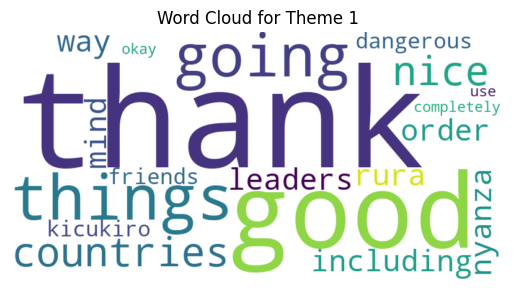

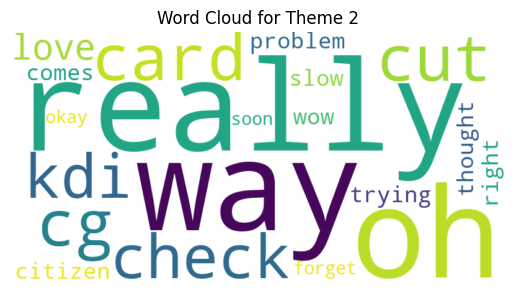

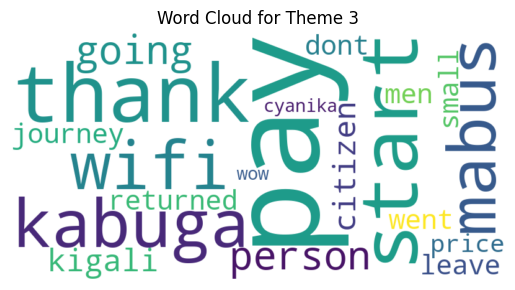

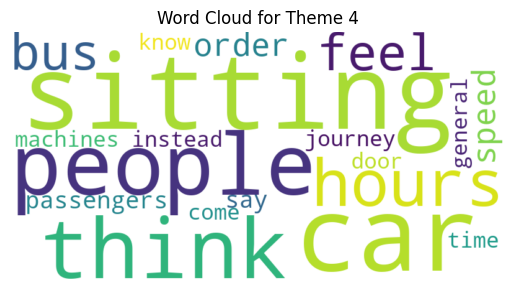

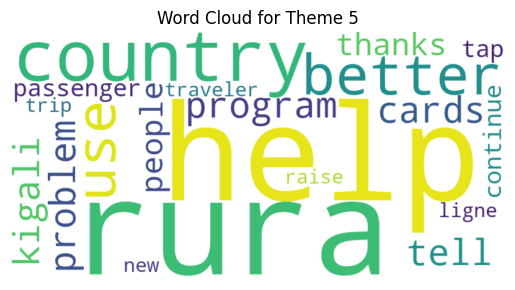

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweets['clean_text'])

# Theme Clustering with NMF
nmf_model = NMF(n_components=5, random_state=42)  # Change n_components for more/fewer themes
nmf_model.fit(tfidf)

# Displaying Top Keywords for Each Theme
def display_top_keywords(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTheme {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("Top Keywords for Each Theme:")
display_top_keywords(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10)

# Assigning theme to each document based on highest theme score
theme_labels = nmf_model.transform(tfidf).argmax(axis=1)
tweets['Theme'] = theme_labels

# Generate Word Clouds for each theme
for theme in range(nmf_model.n_components_):
    words = " ".join([tfidf_vectorizer.get_feature_names_out()[i] for i in nmf_model.components_[theme].argsort()[:-20 - 1:-1]])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Theme {theme + 1}")

plt.show()


## I had to use ClaudeAI to generate a separate dataset with insightful themes because this model's output was meaningless